In [2]:
# Importar librerías necesarias
import sys
import os
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
from datetime import datetime
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Módulos personalizados
from config import Config
from utils.data_processing import DataProcessor

# Configurar ajustes
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*60)
print("JUNTA ANALYTICS – ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)
print("Cuaderno 02: Análisis Detallado de Precipitación y Consumo")
print("Autor: Luis Pillaga")
print(f"Fecha: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*60)


JUNTA ANALYTICS – ANÁLISIS EXPLORATORIO DE DATOS
Cuaderno 02: Análisis Detallado de Precipitación y Consumo
Autor: Luis Pillaga
Fecha: 2025-05-25 14:13:30


In [3]:
# 1. Cargar datos procesados
config = Config()
processed_base_path = "../data/processed/"
# Cargar el dataset fusionado del Notebook 01
try:
    merged_data_path = os.path.join(processed_base_path, 'merged_rainfall_consumption.csv')
    ml_features_path = os.path.join(processed_base_path, 'ml_features.csv')
    individual_data_path = os.path.join(processed_base_path, 'individual_consumption.csv')
    
    merged_data = pd.read_csv(merged_data_path)
    ml_features = pd.read_csv(ml_features_path)
    individual_data = pd.read_csv(individual_data_path)
    
    # Convertir columnas de fecha (manejo de formatos mixtos)
    merged_data['period_dt'] = pd.to_datetime(merged_data['period_dt'], format='mixed')
    individual_data['created_at'] = pd.to_datetime(individual_data['created_at'], format='mixed')
    individual_data['period_start'] = pd.to_datetime(individual_data['period_start'], format='mixed')
    
    print("✅ Datos cargados correctamente")
    print(f"📊 Datos fusionados: {len(merged_data)} períodos")
    print(f"📊 Características ML: {len(ml_features)} períodos")
    print(f"📊 Datos individuales: {len(individual_data)} registros")
    
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")
    print("Por favor, ejecuta primero el Notebook 01 (integración de datos)")
    raise


✅ Datos cargados correctamente
📊 Datos fusionados: 29 períodos
📊 Características ML: 29 períodos
📊 Datos individuales: 10067 registros


In [4]:
# 2. Visión general del dataset y estadísticas básicas

print(f"\n📊 VISIÓN GENERAL DEL DATASET")
print("-" * 40)

# Mostrar forma y rango temporal
print(f"Forma del dataset fusionado: {merged_data.shape}")
print(f"Rango de fechas: {merged_data['period_dt'].min()} a {merged_data['period_dt'].max()}")
print(f"Duración total: {(merged_data['period_dt'].max() - merged_data['period_dt'].min()).days} días")

# Estadísticas clave
print(f"\n📈 ESTADÍSTICAS CLAVE:")
print(f"Consumo mensual promedio: {merged_data['avg_consumption'].mean():.2f} ± {merged_data['avg_consumption'].std():.2f} m³")
print(f"Precipitación mensual promedio: {merged_data['avg_rainfall'].mean():.2f} ± {merged_data['avg_rainfall'].std():.2f} mm")
print(f"Coeficiente de correlación: {merged_data['avg_consumption'].corr(merged_data['avg_rainfall']):.3f}")

# Mostrar primeras filas
print(f"\n📋 MUESTRA DE DATOS:")
cols_muestra = ['period_str', 'avg_consumption', 'avg_rainfall', 'season', 'consumption_category']
print(merged_data[cols_muestra].head(10))



📊 VISIÓN GENERAL DEL DATASET
----------------------------------------
Forma del dataset fusionado: (29, 56)
Rango de fechas: 2022-12-01 00:00:00 a 2025-04-01 00:00:00
Duración total: 852 días

📈 ESTADÍSTICAS CLAVE:
Consumo mensual promedio: 10.24 ± 1.01 m³
Precipitación mensual promedio: 44.70 ± 24.46 mm
Coeficiente de correlación: -0.220

📋 MUESTRA DE DATOS:
  period_str  avg_consumption  avg_rainfall        season consumption_category
0    2022-12        11.338150     29.381542    Dry Season                 High
1    2023-01         9.540462     54.716906    Dry Season                  Low
2    2023-02         9.724138     75.021647    Dry Season               Medium
3    2023-03        10.921965     86.242920    Dry Season                 High
4    2023-04         8.768786     68.109121  Rainy Season                  Low
5    2023-05         9.052023     43.148393  Rainy Season                  Low
6    2023-06         9.455072     30.856227  Rainy Season                  Low
7    

In [7]:
# 3. Profundización en el análisis de correlación

print(f"\n🔍 ANÁLISIS DE CORRELACIÓN")
print("-" * 40)

# Calcular distintos coeficientes de correlación
correlations = {
    'Pearson': merged_data['avg_consumption'].corr(merged_data['avg_rainfall'], method='pearson'),
    'Spearman': merged_data['avg_consumption'].corr(merged_data['avg_rainfall'], method='spearman'),
    'Kendall': merged_data['avg_consumption'].corr(merged_data['avg_rainfall'], method='kendall')
}

print("Coeficientes de correlación:")
for method, corr in correlations.items():
    print(f"  {method}: {corr:.4f}")

# Prueba de significación estadística (Pearson)
from scipy.stats import pearsonr
stat, p_value = pearsonr(merged_data['avg_consumption'], merged_data['avg_rainfall'])
print(f"\nSignificancia estadística (Pearson):")
print(f"  P-valor: {p_value:.6f}")
print(f"  Significativo a α=0.05: {'Sí' if p_value < 0.05 else 'No'}")
print("Conclusión: no hay evidencia sólida de que la lluvia explique el consumo de agua en este periodo.")


🔍 ANÁLISIS DE CORRELACIÓN
----------------------------------------
Coeficientes de correlación:
  Pearson: -0.2195
  Spearman: -0.2293
  Kendall: -0.1317

Significancia estadística (Pearson):
  P-valor: 0.252513
  Significativo a α=0.05: No
Conclusión: no hay evidencia sólida de que la lluvia explique el consumo de agua en este periodo.


In [8]:
# 4. Análisis de patrones estacionales

print(f"\n🗓️  ANÁLISIS DE PATRONES ESTACIONALES")
print("-" * 40)

# 4.1 Patrones mensuales: medias, desviaciones y ratio lluvia-consumo
monthly_stats = merged_data.groupby('month').agg({
    'avg_consumption': ['mean', 'std'],
    'avg_rainfall': ['mean', 'std'],
    'rainfall_consumption_ratio': 'mean'
}).round(2)

print("📊 Patrones mensuales:")
print(monthly_stats)

# 4.2 Estadísticas por estación: resumen completo de consumo y lluvia
seasonal_stats = merged_data.groupby('season').agg({
    'avg_consumption': ['mean', 'std', 'min', 'max'],
    'avg_rainfall': ['mean', 'std', 'min', 'max']
}).round(2)

print("\n📊 Estadísticas estacionales:")
print(seasonal_stats)



🗓️  ANÁLISIS DE PATRONES ESTACIONALES
----------------------------------------
📊 Patrones mensuales:
      avg_consumption       avg_rainfall      rainfall_consumption_ratio
                 mean   std         mean  std                       mean
month                                                                   
1               10.17  1.01        54.72  0.0                       4.93
2                9.90  0.23        75.02  0.0                       6.88
3               10.26  1.00        86.24  0.0                       7.70
4                9.97  1.29        68.11  0.0                       6.26
5                9.67  0.88        43.15  0.0                       4.06
6                8.99  0.65        30.86  0.0                       3.09
7               10.32  1.18        21.98  0.0                       1.95
8               10.96  2.10        16.92  0.0                       1.44
9               10.66  0.38        19.19  0.0                       1.65
10              11.41 

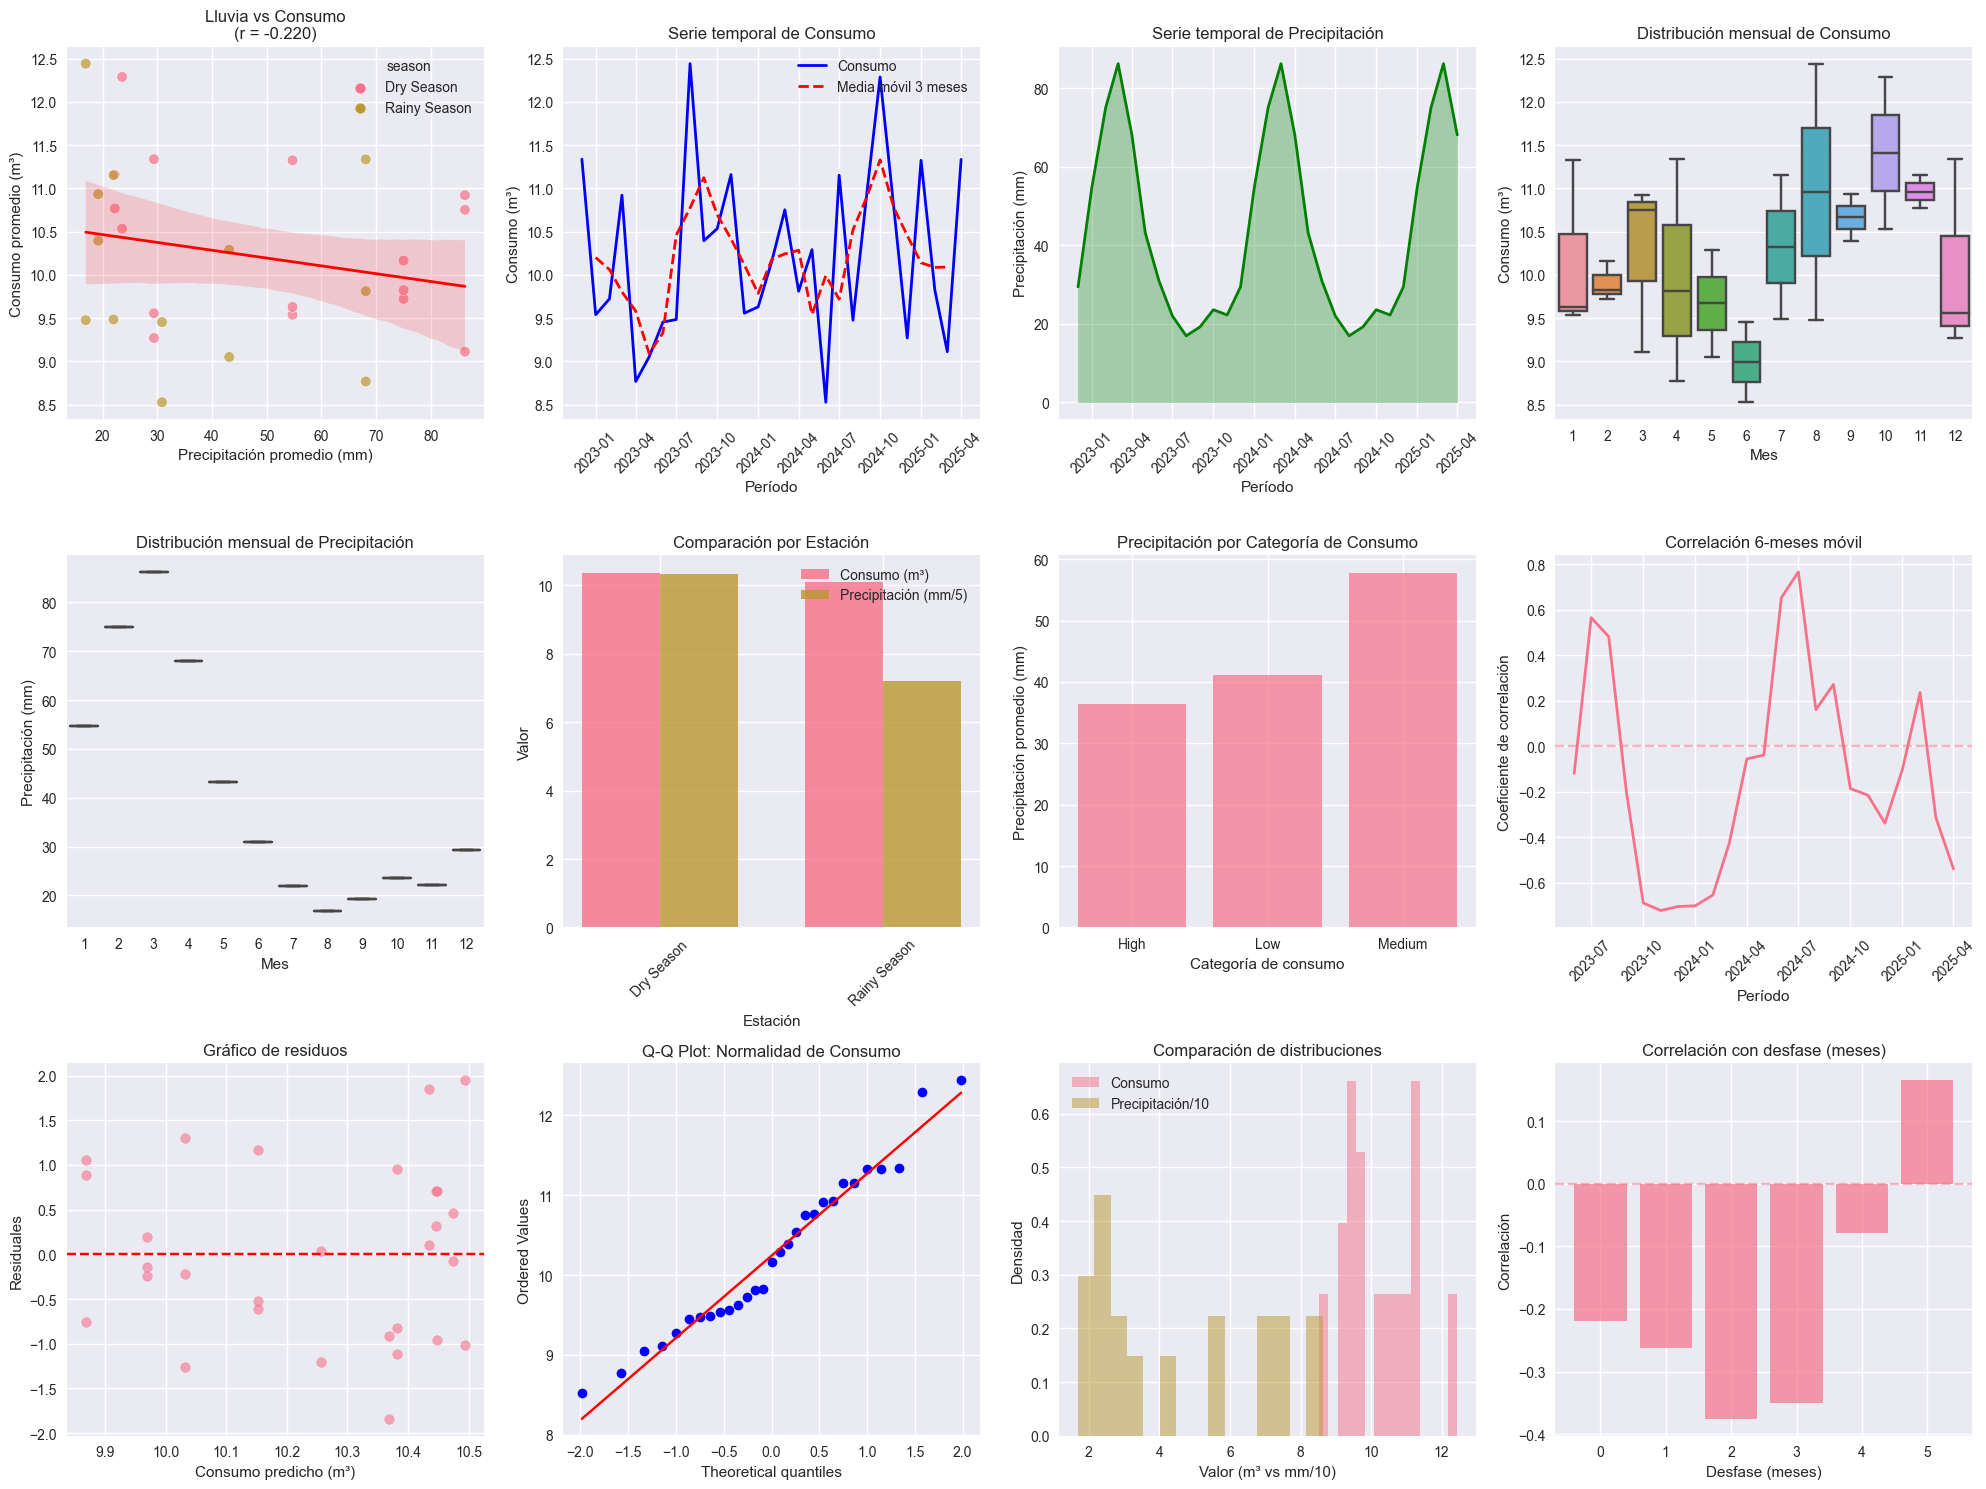

In [10]:
# 5. Visualizaciones Avanzadas

# Preparar datos necesarios
# Usar rfh_mean como avg_rainfall si no existe
if 'avg_rainfall' not in merged_data.columns:
    merged_data['avg_rainfall'] = merged_data['rfh_mean']

# Crear media móvil de consumo si no existe
if 'consumption_ma_3' not in merged_data.columns:
    merged_data_sorted = merged_data.sort_values('period_dt')
    merged_data['consumption_ma_3'] = merged_data_sorted['avg_consumption']\
        .rolling(window=3, center=True).mean()

# Calcular correlación Pearson
correlations = {
    'Pearson': merged_data['avg_rainfall'].corr(merged_data['avg_consumption'])
}

fig = plt.figure(figsize=(20, 15))

# 1. Dispersión y regresión por estación
plt.subplot(3, 4, 1)
sns.scatterplot(data=merged_data, x='avg_rainfall', y='avg_consumption', 
                hue='season', s=60, alpha=0.7)
sns.regplot(data=merged_data, x='avg_rainfall', y='avg_consumption', 
            scatter=False, color='red', line_kws={'linewidth': 2})
plt.title(f'Lluvia vs Consumo\n(r = {correlations["Pearson"]:.3f})')
plt.xlabel('Precipitación promedio (mm)')
plt.ylabel('Consumo promedio (m³)')

# 2. Serie de tiempo de consumo y media móvil
plt.subplot(3, 4, 2)
plt.plot(merged_data['period_dt'], merged_data['avg_consumption'], 'b-', 
         label='Consumo', linewidth=2)
plt.plot(merged_data['period_dt'], merged_data['consumption_ma_3'], 'r--', 
         label='Media móvil 3 meses', linewidth=2)
plt.title('Serie temporal de Consumo')
plt.xlabel('Período')
plt.ylabel('Consumo (m³)')
plt.legend()
plt.xticks(rotation=45)

# 3. Serie de tiempo de precipitación
plt.subplot(3, 4, 3)
plt.plot(merged_data['period_dt'], merged_data['avg_rainfall'], 'g-', 
         linewidth=2)
plt.fill_between(merged_data['period_dt'], merged_data['avg_rainfall'], 
                 alpha=0.3, color='green')
plt.title('Serie temporal de Precipitación')
plt.xlabel('Período')
plt.ylabel('Precipitación (mm)')
plt.xticks(rotation=45)

# 4. Boxplot mensual de consumo
plt.subplot(3, 4, 4)
sns.boxplot(data=merged_data, x='month', y='avg_consumption')
plt.title('Distribución mensual de Consumo')
plt.xlabel('Mes')
plt.ylabel('Consumo (m³)')

# 5. Boxplot mensual de precipitación
plt.subplot(3, 4, 5)
sns.boxplot(data=merged_data, x='month', y='avg_rainfall')
plt.title('Distribución mensual de Precipitación')
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')

# 6. Comparación estacional
plt.subplot(3, 4, 6)
seasonal_data = merged_data.groupby('season')[['avg_consumption', 'avg_rainfall']].mean()
x = np.arange(len(seasonal_data.index))
width = 0.35
plt.bar(x - width/2, seasonal_data['avg_consumption'], width, 
        label='Consumo (m³)', alpha=0.8)
plt.bar(x + width/2, seasonal_data['avg_rainfall']/5, width, 
        label='Precipitación (mm/5)', alpha=0.8)
plt.title('Comparación por Estación')
plt.xlabel('Estación')
plt.ylabel('Valor')
plt.xticks(x, seasonal_data.index, rotation=45)
plt.legend()

# 7. Precipitación según categoría de consumo
plt.subplot(3, 4, 7)
category_rainfall = merged_data.groupby('consumption_category')['avg_rainfall'].mean()
plt.bar(category_rainfall.index, category_rainfall.values, 
        alpha=0.7)
plt.title('Precipitación por Categoría de Consumo')
plt.xlabel('Categoría de consumo')
plt.ylabel('Precipitación promedio (mm)')

# 8. Correlación móvil a 6 meses
plt.subplot(3, 4, 8)
merged_data_sorted = merged_data.sort_values('period_dt')
rolling_corr_values = []
rolling_dates = []
window_size = 6
for i in range(window_size, len(merged_data_sorted)):
    window = merged_data_sorted.iloc[i-window_size:i]
    corr = window['avg_consumption'].corr(window['avg_rainfall'])
    if not pd.isna(corr):
        rolling_corr_values.append(corr)
        rolling_dates.append(merged_data_sorted.iloc[i]['period_dt'])
plt.plot(rolling_dates, rolling_corr_values, linewidth=2)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.title('Correlación 6-meses móvil')
plt.xlabel('Período')
plt.ylabel('Coeficiente de correlación')
plt.xticks(rotation=45)

# 9. Análisis de residuos de regresión lineal
plt.subplot(3, 4, 9)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = merged_data[['avg_rainfall']].values
y = merged_data['avg_consumption'].values
lr.fit(X, y)
preds = lr.predict(X)
resid = y - preds
plt.scatter(preds, resid, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Consumo predicho (m³)')
plt.ylabel('Residuales')

# 10. Q-Q plot para normalidad de consumo
plt.subplot(3, 4, 10)
from scipy import stats
stats.probplot(merged_data['avg_consumption'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Normalidad de Consumo')

# 11. Comparación de distribuciones
plt.subplot(3, 4, 11)
plt.hist(merged_data['avg_consumption'], bins=15, alpha=0.5, density=True)
plt.hist(merged_data['avg_rainfall']/10, bins=15, alpha=0.5, density=True)
plt.title('Comparación de distribuciones')
plt.xlabel('Valor (m³ vs mm/10)')
plt.ylabel('Densidad')
plt.legend(['Consumo','Precipitación/10'])

# 12. Análisis de correlaciones con desfase
plt.subplot(3, 4, 12)
lag_corrs = []
for lag in range(0, 6):
    if lag == 0:
        c = merged_data_sorted['avg_consumption'].corr(merged_data_sorted['avg_rainfall'])
    else:
        c = merged_data_sorted['avg_consumption'].corr(merged_data_sorted['avg_rainfall'].shift(lag))
    lag_corrs.append(c if not pd.isna(c) else 0)
plt.bar(range(6), lag_corrs, alpha=0.7)
plt.axhline(0, linestyle='--', alpha=0.5)
plt.title('Correlación con desfase (meses)')
plt.xlabel('Desfase (meses)')
plt.ylabel('Correlación')

plt.tight_layout()
plt.show()


In [12]:
# 6. Análisis de patrones de consumo individual

print(f"\n👥 ANÁLISIS DE CONSUMO INDIVIDUAL")
print("-" * 40)

# 6.1 Estadísticas por medidor de agua
meter_stats = individual_data.groupby('water_meter_id').agg({
    'total_consumed': ['count', 'mean', 'std', 'min', 'max'],
    'neighborhood_id': 'first'
}).round(2)

# Renombrar columnas para mayor claridad
meter_stats.columns = [
    'num_lecturas', 'consumo_promedio', 'std_consumo',
    'consumo_minimo', 'consumo_maximo', 'barrio'
]

print("📊 Estadísticas por medidor:")
print(f"  Total de medidores únicos: {len(meter_stats)}")
print(f"  Lecturas promedio por medidor: {meter_stats['num_lecturas'].mean():.1f}")
print(f"  Rango de consumo promedio: {meter_stats['consumo_promedio'].min():.1f} - {meter_stats['consumo_promedio'].max():.1f} m³")

# 6.2 Top 10 medidores con mayor consumo promedio
top_consumers = meter_stats.nlargest(10, 'consumo_promedio')
print("\n🏆 Top 10 medidores por consumo promedio:")
print(top_consumers[['consumo_promedio', 'std_consumo', 'barrio']])

# 6.3 Análisis por barrio
neighborhood_stats = individual_data.groupby('neighborhood_name').agg({
    'total_consumed': ['count', 'mean', 'std'],
    'water_meter_id': 'nunique'
}).round(2)

neighborhood_stats.columns = [
    'total_lecturas', 'consumo_promedio', 'std_consumo', 'medidores_unicos'
]

print("\n🌆 Análisis por barrio:")
print(neighborhood_stats)


👥 ANÁLISIS DE CONSUMO INDIVIDUAL
----------------------------------------
📊 Estadísticas por medidor:
  Total de medidores únicos: 362
  Lecturas promedio por medidor: 27.8
  Rango de consumo promedio: 0.0 - 88.0 m³

🏆 Top 10 medidores por consumo promedio:
                consumo_promedio  std_consumo barrio
water_meter_id                                      
1054                       88.00          NaN     JB
1050                       63.25        19.82      C
530                        44.24        10.55     JB
503                        41.38         7.88      L
599                        39.86        22.06      C
471                        37.76        28.96      E
1051                       37.75        30.87      C
579                        36.07         8.54      L
607                        34.97         8.27      C
433                        33.76        12.19      L

🌆 Análisis por barrio:
                   total_lecturas  consumo_promedio  std_consumo  \
neighborhood_

In [15]:
# 11. Resumen e insights clave

print(f"\n📋 RESUMEN DE INSIGHTS CLAVE")
print("=" * 40)

# 11.1 Interpretación de correlación
corr_val = correlations['Pearson']
corr_strength = abs(corr_val)
if corr_strength < 0.1:
    corr_label = "Muy débil"
elif corr_strength < 0.3:
    corr_label = "Débil"
elif corr_strength < 0.5:
    corr_label = "Moderada"
elif corr_strength < 0.7:
    corr_label = "Fuerte"
else:
    corr_label = "Muy fuerte"

print("🔍 INSIGHTS DE CORRELACIÓN:")
print(f"  • Correlación lluvia–consumo: {corr_val:.3f} ({corr_label})")
print(f"  • Significancia estadística: {'Significativo' if p_value < 0.05 else 'No significativo'} (p={p_value:.6f})")

# 11.2 Patrones temporales
print(f"\n📊 PATRONES TEMPORALES:")
highest_c = monthly_stats[('avg_consumption', 'mean')].idxmax()
lowest_c  = monthly_stats[('avg_consumption', 'mean')].idxmin()
highest_r = monthly_stats[('avg_rainfall',   'mean')].idxmax()
lowest_r  = monthly_stats[('avg_rainfall',   'mean')].idxmin()
print(f"  • Mes de mayor consumo: {highest_c}")
print(f"  • Mes de menor consumo: {lowest_c}")
print(f"  • Mes de mayor precipitación: {highest_r}")
print(f"  • Mes de menor precipitación: {lowest_r}")

# 11.3 Patrones espaciales
print(f"\n🏘️  PATRONES ESPACIALES:")
if 'neighborhood_stats' in globals() and not neighborhood_stats.empty:
    top_nb = neighborhood_stats['consumo_promedio'].idxmax()
    bot_nb = neighborhood_stats['consumo_promedio'].idxmin()
    print(f"  • Barrio con mayor consumo promedio: {top_nb}")
    print(f"  • Barrio con menor consumo promedio: {bot_nb}")

# 11.4 Recomendaciones para modelado
print(f"\n🎯 RECOMENDACIONES DE MODELADO:")
if abs(corr_val) > 0.3:
    print("  • Correlación suficiente para modelos predictivos.")
else:
    print("  • Correlación débil: considerar añadir más variables explicativas.")

if 'available_features' in globals() and len(available_features) >= 2:
    comps_80 = np.where(cumsum >= 0.8)[0][0] + 1
    print(f"  • {comps_80} componentes explican el 80% de la varianza.")

print("  • Incluir características temporales dado los patrones estacionales detectados.")

if 'high_corr_pairs' in globals() and len(high_corr_pairs) > 0:
    print(f"  • {len(high_corr_pairs)} pares de características muy correlacionadas: considerar selección de variables.")

print(f"\n✅ ¡EDA FINALIZADO CON ÉXITO!")



📋 RESUMEN DE INSIGHTS CLAVE
🔍 INSIGHTS DE CORRELACIÓN:
  • Correlación lluvia–consumo: -0.220 (Débil)
  • Significancia estadística: No significativo (p=0.252513)

📊 PATRONES TEMPORALES:
  • Mes de mayor consumo: 10
  • Mes de menor consumo: 6
  • Mes de mayor precipitación: 3
  • Mes de menor precipitación: 8

🏘️  PATRONES ESPACIALES:
  • Barrio con mayor consumo promedio: La Loma
  • Barrio con menor consumo promedio: La Dolorosa

🎯 RECOMENDACIONES DE MODELADO:
  • Correlación débil: considerar añadir más variables explicativas.
  • Incluir características temporales dado los patrones estacionales detectados.

✅ ¡EDA FINALIZADO CON ÉXITO!
